# UK Lotto Results Analysis

Author: Matthew Carter

## Introduction

The UK Lotto has been run by The National Lottery since 1994 and is now drawn twice a week. Players choose six balls and aim to match the six main balls in the draw to win the jackpot. Including a bonus ball, seven balls in total are drawn. Smaller prizes are won from matching two or more main balls.

In this mini analysis I look at the draws since the new Lotto format was introduced on the 8th October 2015 which increased the number of balls in the draw from 49 to 59.

## Importing the dataset

Lotto results for this project have been collected using my __[uk_lotto_scraper.py](https://github.com/MatthewCarterIO/uk-lotto-DA/blob/master/uk_lotto_scraper.py)__ file.

In [1]:
# Common Python packages that will be used throughout project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Import the draw results.
results_df = pd.read_csv("lotto_results.csv")
results_df.head()

,draw_date,main_balls,bonus_ball
0,2015-12-30,"[22, 31, 47, 52, 55, 59]",23
1,2015-12-26,"[17, 21, 31, 38, 44, 58]",20
2,2015-12-23,"[1, 2, 4, 19, 28, 41]",32
3,2015-12-19,"[13, 14, 27, 46, 48, 50]",42
4,2015-12-16,"[10, 12, 35, 46, 48, 57]",14


In [3]:
# Sort the DataFrame into ascending date order and make the draw_date column the index.
results_df.sort_values(by=["draw_date"], inplace=True)
results_df.set_index("draw_date", inplace=True)
results_df.head()

,main_balls,bonus_ball
draw_date,,
2015-01-03,"[10, 15, 17, 18, 19, 31]",24
2015-01-07,"[4, 5, 10, 12, 20, 23]",24
2015-01-10,"[13, 14, 16, 24, 41, 43]",39
2015-01-14,"[17, 20, 28, 29, 33, 36]",23
2015-01-17,"[29, 37, 42, 46, 47, 49]",4


In this analysis the draw dates of interest are those after the 8th October 2015, running to the present (end of January 2020 at time of writing) when the new Lotto format was used.

In [4]:
# Select rows in DataFrame after 2015-10-08.
results_df = results_df.loc["2015-10-08" : "2020-01-31"]
results_df

,main_balls,bonus_ball
draw_date,,
2015-10-10,"[2, 3, 16, 32, 53, 54]",8
2015-10-14,"[7, 13, 20, 27, 39, 52]",35
2015-10-17,"[8, 30, 37, 40, 46, 50]",36
2015-10-21,"[13, 14, 21, 25, 51, 53]",39
2015-10-24,"[29, 31, 43, 55, 58, 59]",11
...,...,...
2020-01-15,"[15, 25, 50, 52, 54, 55]",28
2020-01-18,"[14, 29, 35, 41, 42, 55]",11
2020-01-22,"[19, 23, 25, 29, 30, 36]",14


Saving the DataFrame to a CSV file in __[uk_lotto_scraper.py](https://github.com/MatthewCarterIO/uk-lotto-DA/blob/master/uk_lotto_scraper.py)__ resulted in the main balls column which contained lists of integers for each draw, instead being stored as strings.

In [5]:
print(type(results_df.loc["2015-10-10", "main_balls"]))

<class 'str'>


In [6]:
from ast import literal_eval

# Function converting string back into a list of integers.
def string_to_int_list(string_list):
    return literal_eval(string_list)

# Apply function to each row of the main_balls column.
results_df["main_balls"] = results_df["main_balls"].apply(string_to_int_list)
print(type(results_df.loc["2015-10-10", "main_balls"]))

<class 'list'>


For analysis it will be useful to have each of the six main balls in its own column.

In [7]:
# Create a new DataFrame containing just the main balls.
main_balls_df = pd.DataFrame(results_df["main_balls"].tolist(), index=results_df.index)
# Rename the columns.
main_balls_df.columns = [("ball_" + str(x)) for x in range(1, 7)]
# Combine this new DataFrame with the results DataFrame.
results_df = pd.concat([results_df, main_balls_df], axis=1)
results_df.head()

,main_balls,bonus_ball,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6
draw_date,,,,,,,,
2015-10-10,"[2, 3, 16, 32, 53, 54]",8,2,3,16,32,53,54
2015-10-14,"[7, 13, 20, 27, 39, 52]",35,7,13,20,27,39,52
2015-10-17,"[8, 30, 37, 40, 46, 50]",36,8,30,37,40,46,50
2015-10-21,"[13, 14, 21, 25, 51, 53]",39,13,14,21,25,51,53
2015-10-24,"[29, 31, 43, 55, 58, 59]",11,29,31,43,55,58,59


Logically the bonus ball column should come after the main balls in the DataFrame.

In [8]:
# Save the bonus ball column as a Series.
bonus_ball_series = results_df["bonus_ball"]
# Remove the bonus ball column from the DataFrame
results_df = results_df.drop(["bonus_ball"], axis=1)
# Add the bonus ball column once again at the end of the DataFrame.
results_df = pd.concat([results_df, bonus_ball_series], axis=1)
results_df.head()

,main_balls,ball_1,ball_2,ball_3,ball_4,ball_5,ball_6,bonus_ball
draw_date,,,,,,,,
2015-10-10,"[2, 3, 16, 32, 53, 54]",2,3,16,32,53,54,8
2015-10-14,"[7, 13, 20, 27, 39, 52]",7,13,20,27,39,52,35
2015-10-17,"[8, 30, 37, 40, 46, 50]",8,30,37,40,46,50,36
2015-10-21,"[13, 14, 21, 25, 51, 53]",13,14,21,25,51,53,39
2015-10-24,"[29, 31, 43, 55, 58, 59]",29,31,43,55,58,59,11


In [9]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 2015-10-10 to 2020-01-29
Data columns (total 8 columns):
main_balls    450 non-null object
ball_1        450 non-null int64
ball_2        450 non-null int64
ball_3        450 non-null int64
ball_4        450 non-null int64
ball_5        450 non-null int64
ball_6        450 non-null int64
bonus_ball    450 non-null int64
dtypes: int64(7), object(1)
memory usage: 51.6+ KB


The data is now filtered for the draws of interest and organised, ready for analysis.

## Analysis

Lotto numbers are a categorical (nominal) data type since their numbers are only identifiers (could easily be replaced with words or colours etc.).

In the 450 draws that took place in this dataset, I'd expect the number of times each ball was drawn to be fairly similar.

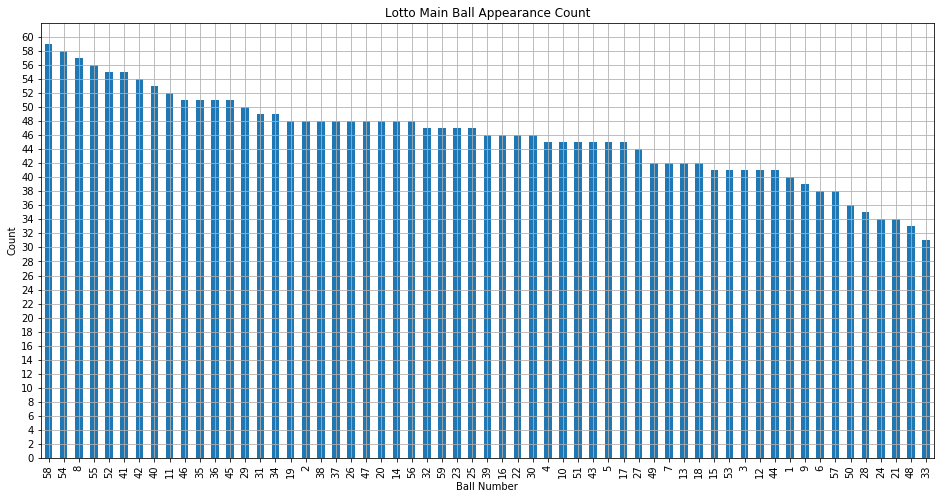

In [10]:
# Display a bar plot showing the number of times each ball has been drawn.
main_ball_count = results_df[["ball_1", "ball_2", "ball_3", "ball_4", "ball_5", "ball_6"]].stack().value_counts()
main_ball_count.plot(kind="bar", figsize=(16,8), title="Lotto Main Ball Appearance Count", grid=True, yticks=range(0, 62, 2))
plt.xlabel("Ball Number")
plt.ylabel("Count")
plt.show()

The bar chart above shows the number of times each ball has appeared in descending order from left to right. The most popular number was drawn 59 times and the least popular just 31 times.

In [11]:
main_ball_count.describe()

count    59.000000
mean     45.762712
std       6.339093
min      31.000000
25%      41.500000
50%      46.000000
75%      49.000000
max      59.000000
dtype: float64

The average appearance count of the balls was 45.8. The interquartile range was a fairly narrow 7.5, with 50% of the balls appearing between 41.5 and 49 times. However the range between least and most appearances is substantial at 28. This can be visualised with a box plot.

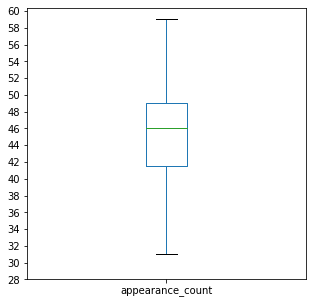

In [12]:
# Display a box plot for the count data. 
# NB. Although a boxplot can be created from a Series, to use the name in the plot it needs converting a into DataFrame.
main_ball_count_df = main_ball_count.to_frame(name="appearance_count")
main_ball_count_df.plot(kind="box", figsize=(5,5), yticks=range(28, 62, 2))
plt.show()

If the top six drawn numbers from all 450 draws in this dataset had been played each time, how many times would a prize have been won?

In [13]:
# Function to compare two lists of six numbers and return the number of matches.
def ticket_checker(draw_list, ticket_list):
    no_of_matches = 0
    index_draw = 0 
    index_ticket = 0
    while (index_ticket <= (len(ticket_list)-1)) and (index_draw <= (len(draw_list)-1)):
            if ticket_list[index_ticket] == draw_list[index_draw]:
                # Numbers match, move onto next ball on ticket and in draw.
                no_of_matches += 1
                index_ticket += 1
                index_draw += 1
            elif ticket_list[index_ticket] > draw_list[index_draw]:
                # Ticket ball is higher than the drawn ball it is being compared to. Move onto next ball from draw.
                index_draw += 1
            else:
                # Ticket ball is lower than the drawn ball it is being compared to. Move onto next ball on ticket.
                index_ticket += 1
    return no_of_matches

In [14]:
# Top six numbers from 450 draws in this dataset. 
top_six_numbers = [8, 41, 52, 54, 55, 58]

wins_series = results_df["main_balls"].apply(lambda x: ticket_checker(x, top_six_numbers))
wins_series.value_counts()

0    198
1    173
2     70
3      9
Name: main_balls, dtype: int64

Prizes are given for matching two or more balls, so for the six most popular numbers, 79 tickets would have been winners. With each ticket costing £2, the outlay would have been £900. Two balls give you a free lucky dip ticket, so the only concrete return on the investment would have been £270 for the tickets matching three balls (each win £30).

In [15]:
# Get the draw dates where the ticket matched three balls.
wins_series.loc[lambda x: x == 3]

draw_date
2016-01-23    3
2016-01-27    3
2016-08-20    3
2017-03-25    3
2017-10-28    3
2018-06-27    3
2018-07-04    3
2018-07-14    3
2020-01-15    3
Name: main_balls, dtype: int64

Above I made the assumption that a lucky dip would always give zero return which is clearly not the reality as they are still just six random numbers despite not being picked by a human. So how much might a lucky dip ticket make across the 450 draws?

In [16]:
# Create random (lucky dip) lottery tickets.
def create_random_tickets(no_of_tickets):
    ticket_wallet = []
    for i in range(no_of_tickets):
        # Set the seed for reproducability purposes of this project.
        random.seed(i)
        # Create a random six number ticket from numbers 1-59, sorted in ascending order.
        ticket = sorted(random.sample(range(1,60), 6))
        ticket_wallet.append(ticket)
    # Return list of tickets.
    return ticket_wallet

my_lucky_dip_list = create_random_tickets(5)
print(my_lucky_dip_list)

[[3, 17, 25, 27, 49, 55], [5, 9, 37, 49, 52, 55], [4, 6, 24, 55, 56, 59], [9, 16, 24, 35, 38, 39], [7, 16, 20, 26, 31, 47]]


In [17]:
# Create a function to check each lucky dip ticket in a list against all the draws in the dataset.
def checking_lucky_dips(list_of_tickets):
    # Create a dictionary to hold the results and a counter to name the keys.
    lucky_dip_results = {}
    ticket_no = 1
    for ticket in list_of_tickets:
        # Apply the ticket_checker function from earlier to the current lucky dip ticket.
        lucky_dip_series = results_df["main_balls"].apply(lambda x: ticket_checker(x, ticket))
        # Add the number of times the ticket won and lost to the dictionary.
        lucky_dip_results[("ticket_" + str(ticket_no))] = lucky_dip_series.value_counts()
        ticket_no += 1
    return lucky_dip_results

checking_lucky_dips(my_lucky_dip_list)

{'ticket_1': 0    228
 1    176
 2     39
 3      7
 Name: main_balls, dtype: int64, 'ticket_2': 0    216
 1    188
 2     41
 3      5
 Name: main_balls, dtype: int64, 'ticket_3': 0    235
 1    167
 2     43
 3      5
 Name: main_balls, dtype: int64, 'ticket_4': 0    239
 1    165
 2     39
 3      7
 Name: main_balls, dtype: int64, 'ticket_5': 0    232
 1    163
 2     47
 3      8
 Name: main_balls, dtype: int64}